

#ECG Dataset Classification using KNN, Random Forest, XGBoost, Multilayer Perceptron, and CNN


### 2. Import the required Libraries

In [ ]:
#importing required libraries for another branch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

### 3. Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Change Current Working Directory to required folder
path1 ="/content/drive/MyDrive/ECG_notebook/mitbih_train.csv"
path2="/content/drive/MyDrive/ECG_notebook/mitbih_test.csv"

### 4. Load the Datasets

In [ ]:
df = pd.read_csv(path1, header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#test dataset
test_df = pd.read_csv(path2,header = None)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Exploratory Data Analysis

#### 5.1 Train dataset Analysis

In [ ]:
df.shape

(87554, 188)

In [ ]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

Text(0, 0.5, 'Number of samples')

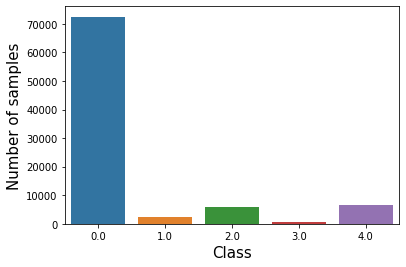

In [ ]:
p=sns.countplot(x=187,data=df)
p.set_xlabel("Class", fontsize = 25)
p.set_ylabel("Number of samples", fontsize = 25)

The dependent variable is highly skewed. We need to resample this to have better results after training the model.

In [ ]:
from sklearn.utils import resample

class_0 = resample(df[df[187]==0],replace=True,n_samples=5000,random_state=41)
class_1 = resample(df[df[187]==1],replace=True,n_samples=5000,random_state=42)
class_2 = resample(df[df[187]==2],replace=True,n_samples=5000,random_state=43)
class_3 = resample(df[df[187]==3],replace=True,n_samples=5000,random_state=44)
class_4 = resample(df[df[187]==4],replace=True,n_samples=5000,random_state=45)




In [ ]:
train_df = pd.concat([class_0, class_1, class_2, class_3, class_4])
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
34752,1.000000,0.984314,0.545098,0.203922,0.184314,0.229412,0.231373,0.221569,0.217647,0.215686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.948586,0.758355,0.257069,0.025707,0.053985,0.051414,0.005141,0.000000,0.015424,0.010283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61324,0.967320,0.918301,0.526144,0.000000,0.009804,0.218954,0.303922,0.352941,0.372549,0.388889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53491,1.000000,0.931035,0.729064,0.467980,0.246305,0.133005,0.088670,0.064039,0.078818,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50777,1.000000,0.859223,0.713592,0.495146,0.315534,0.199029,0.218447,0.247573,0.252427,0.276699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Number of samples')

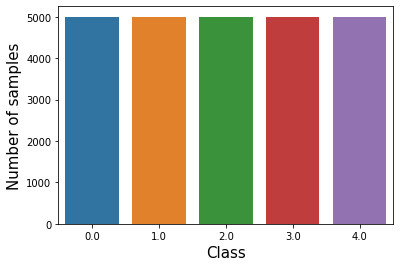

In [ ]:
pl=sns.countplot(x=187, data = train_df) 
pl.set_xlabel("Class", fontsize = 15)
pl.set_ylabel("Number of samples", fontsize = 15)

In [ ]:
X_train = train_df.drop(187,axis=1)
X_test = test_df.drop(187,axis=1)
y_train = train_df[187]
y_test = test_df[187]
len(X_train)

25000

##Implementing KNN classifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_val1,y_train1, y_val1 = train_test_split(X_train,y_train,test_size=0.2,random_state=20,stratify = y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred = knn.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,y_test_pred))

[[15657  1412   476   473   100]
 [   71   458    17     7     3]
 [   33    40  1331    40     4]
 [    6     2     9   145     0]
 [   20    14    23     4  1547]]


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     18118
         1.0       0.24      0.82      0.37       556
         2.0       0.72      0.92      0.81      1448
         3.0       0.22      0.90      0.35       162
         4.0       0.94      0.96      0.95      1608

    accuracy                           0.87     21892
   macro avg       0.62      0.89      0.68     21892
weighted avg       0.94      0.87      0.90     21892



In [ ]:
Ks = 50
error_rate = []

for i in range(1,50):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    pred_i = knn.predict(x_val1)
    error_rate.append(np.mean(pred_i != y_val1))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate',fontsize=)

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

SyntaxError: ignored

Minimum error:- 0.0308 at K = 0


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 <a list of 9 Text major ticklabel objects>)

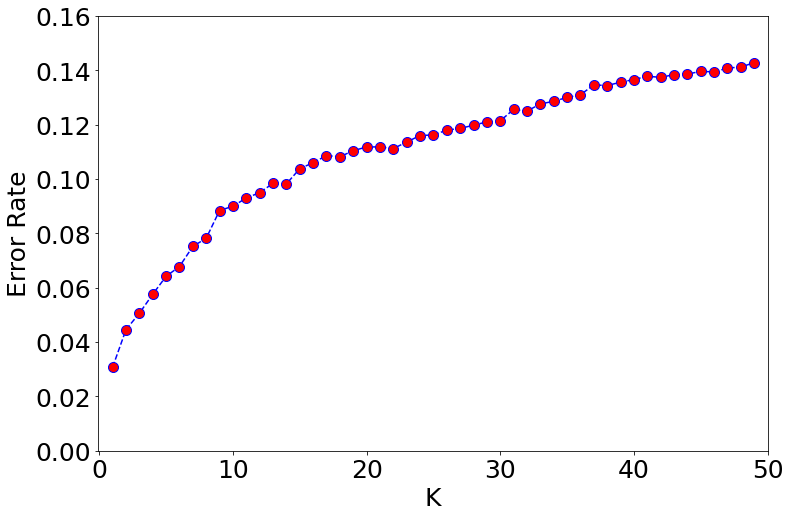

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.xlabel('K',fontsize=25)
plt.ylabel('Error Rate',fontsize=25)
plt.xlim(-0.1,50)
plt.ylim(0,0.16)
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

Maximum accuracy:- 0.9692 at K = 0


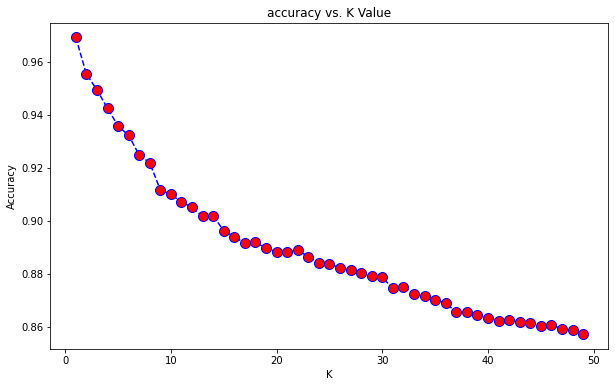

In [ ]:
acc = []

from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train1,y_train1)
    yhat = neigh.predict(x_val1)
    acc.append(metrics.accuracy_score(y_val1, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
acc
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

(array([0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 9 Text major ticklabel objects>)

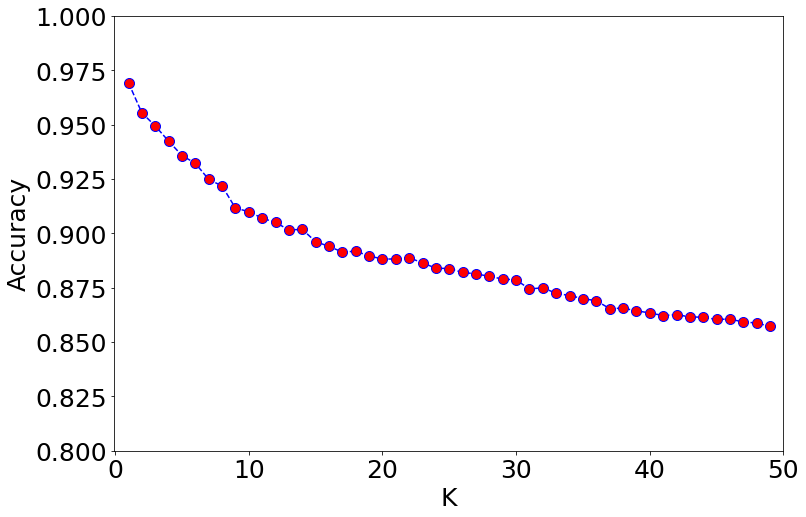

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('K',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlim(-0.1,50)
plt.ylim(0.8,1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param = {'n_neighbors':list(range(1,20))}
grid_search = RandomizedSearchCV(knn, param,n_jobs=-1, cv=10, n_iter=10, scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19]},
                   scoring='accuracy')

In [ ]:
best_para = grid_search.best_params_

In [ ]:
best_para

{'n_neighbors': 1}

In [ ]:
knn_best = grid_search.best_estimator_
y_best_pred_knn = knn_best.predict(X_test)
print(classification_report(y_test,y_best_pred_knn))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     18118
         1.0       0.37      0.81      0.51       556
         2.0       0.77      0.95      0.85      1448
         3.0       0.41      0.81      0.54       162
         4.0       0.93      0.97      0.95      1608

    accuracy                           0.93     21892
   macro avg       0.69      0.89      0.76     21892
weighted avg       0.95      0.93      0.93     21892



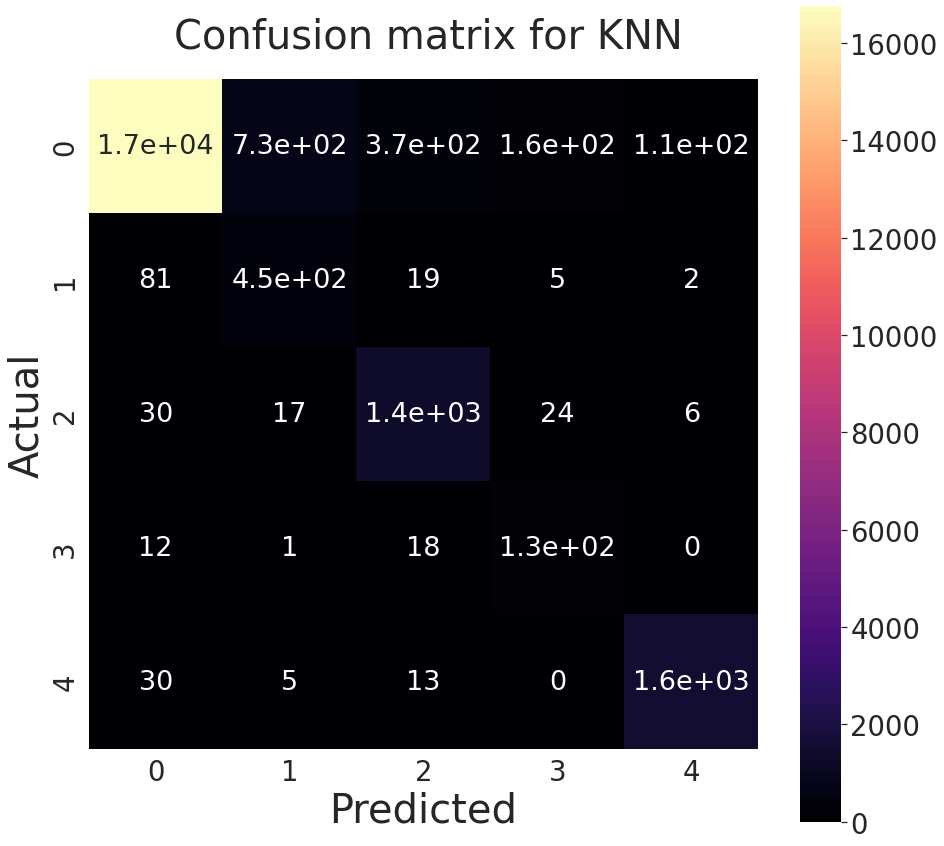

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_best_pred_knn)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (15,15))
sns.set(font_scale=2.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 27}, square=True,cmap='magma')
plt.xlabel('Predicted',fontsize=40)
plt.ylabel('Actual',fontsize=40)
plt.suptitle('Confusion matrix for KNN', size=40, y=0.87,x=0.44)
plt.show()

# Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     18118
         1.0       0.57      0.80      0.67       556
         2.0       0.86      0.94      0.90      1448
         3.0       0.50      0.81      0.62       162
         4.0       0.96      0.97      0.96      1608

    accuracy                           0.96     21892
   macro avg       0.78      0.90      0.83     21892
weighted avg       0.96      0.96      0.96     21892



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param ={'max_depth':list(range(1,100,5))+['None'],'n_estimators':list(range(1,100,5)),'max_samples':[0,0.1,0.2,0.4,0.5,0.6,0.8,0.9,1],'min_samples_split':list(range(2,20))}
grid_search = RandomizedSearchCV(clf, param,n_iter=100,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 81, 86, 91,
                                                      96, 'None'],
                                        'max_samples': [0, 0.1, 0.2, 0.4, 0.5,
                                                        0.6, 0.8, 0.9, 1],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [1, 6, 11, 16, 21, 26,
                                                

In [ ]:
m=grid_search.best_params_


In [ ]:
clf_best=grid_search.best_estimator_
clf_best

RandomForestClassifier(max_depth=96, max_samples=0.9, min_samples_split=3,
                       n_estimators=61)

In [ ]:
y_test_pred_rf=clf_best.predict(X_test)
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     18118
         1.0       0.55      0.81      0.66       556
         2.0       0.86      0.94      0.90      1448
         3.0       0.46      0.83      0.60       162
         4.0       0.95      0.97      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.76      0.90      0.82     21892
weighted avg       0.96      0.95      0.96     21892



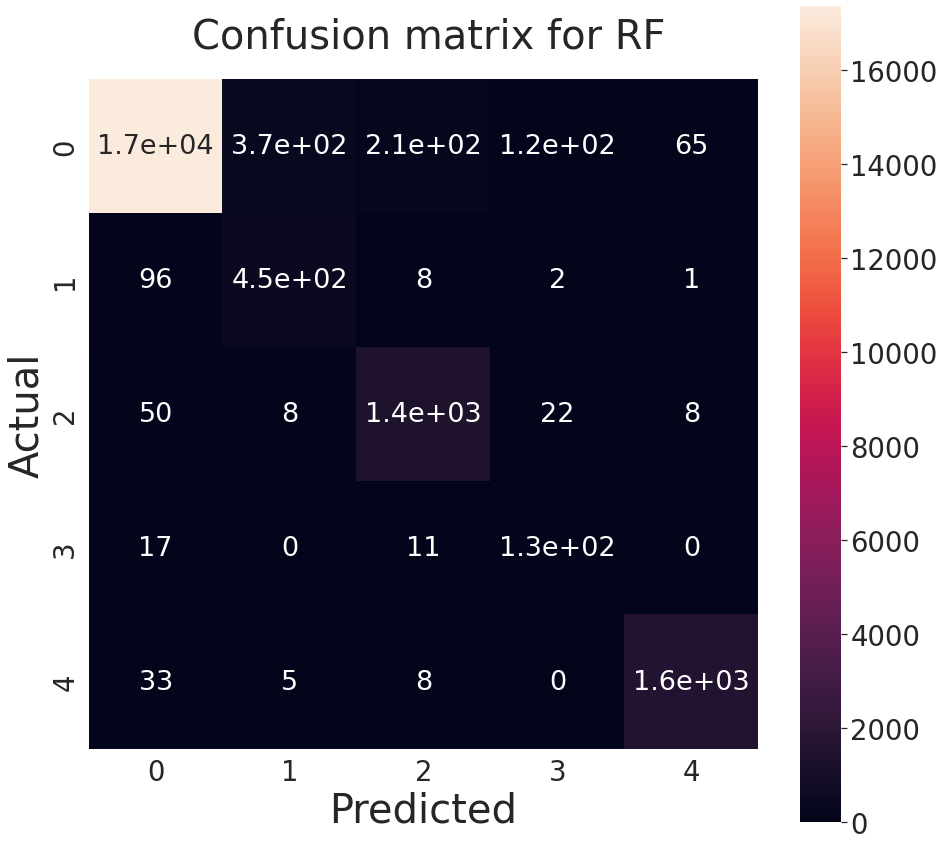

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (15,15))
sns.set(font_scale=2.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 27}, square=True)
plt.xlabel('Predicted',fontsize=40)
plt.ylabel('Actual',fontsize=40)
plt.suptitle('Confusion matrix for RF', size=40, y=0.87,x=0.44)
plt.show()

# **XGBoost Classifier**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2,3,4])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4])
y_train_bin

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
params = params = {'learning_rate': [0.1],'n_estimators':[200]}

grid_search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=100, cv=5, n_jobs=-1)


In [ ]:
classifier = OneVsRestClassifier(grid_search).fit(X_train,y_train_bin)

In [ ]:
y_test_pred_xgb = classifier.predict(X_test)
y_test_pred_xgb

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
print('XGB Test Data performance')
print('-------------------------------------------------------')
print(classification_report(y_test_bin, y_test_pred_xgb))

XGB Test Data performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.77      0.86     18118
           1       0.37      0.78      0.50       556
           2       0.81      0.89      0.84      1448
           3       0.22      0.86      0.36       162
           4       0.92      0.96      0.94      1608

   micro avg       0.91      0.79      0.84     21892
   macro avg       0.66      0.85      0.70     21892
weighted avg       0.95      0.79      0.86     21892
 samples avg       0.78      0.79      0.78     21892



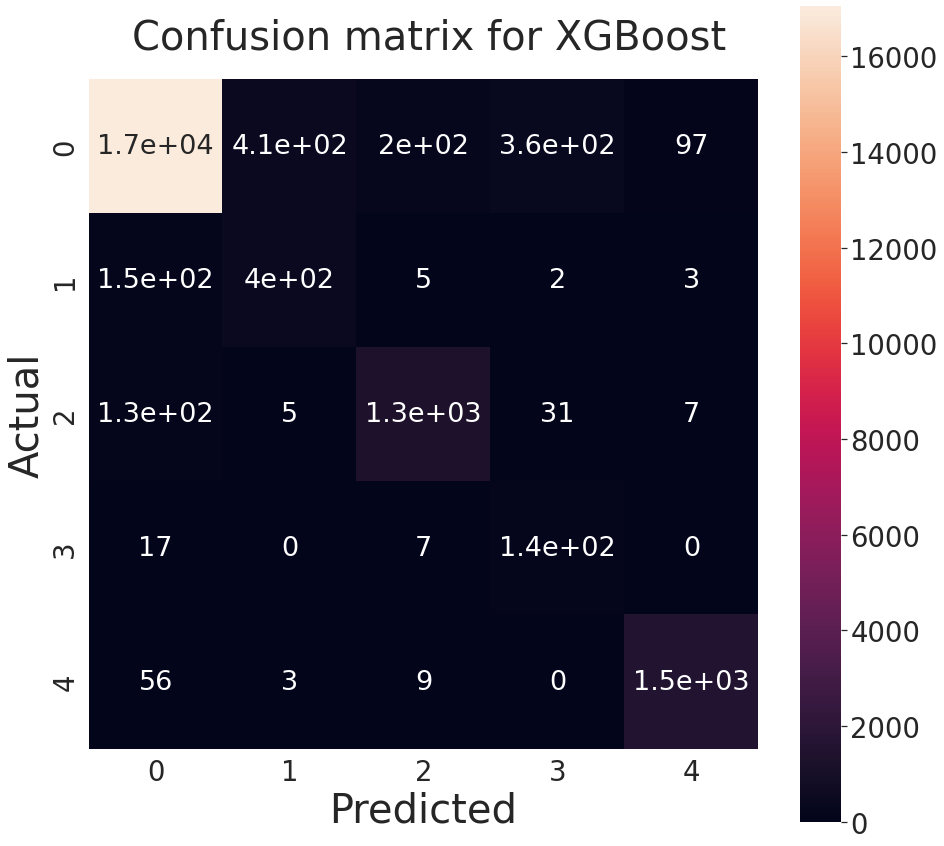

In [ ]:
#plotting heatmap of confusion matrix for XGBOOST
prediction = [np.argmax(i) for i in y_test_pred]
cm_xgb = tf.math.confusion_matrix(labels = y_test, predictions = prediction)
plt.figure(figsize = (15,15))
sns.heatmap(cm_xgb, annot=True, annot_kws={"size": 27}, square=True)

sns.set(font_scale=2.5)
plt.xlabel('Predicted',fontsize=40)
plt.ylabel('Actual',fontsize=40)
plt.suptitle('Confusion matrix for XGBoost', size=40, y=0.87,x=0.44)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_bin, y_test_pred_xgb)

0.7645258541933126

### 8. Implementing Multilayer Perceptron

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [ ]:
model_mlp = Sequential([
    
    # dense layer 1
    Dense(187, activation='sigmoid'),  
    
    # dense layer 2
    Dense(64, activation='sigmoid'), 
    
      # output layer
    Dense(5, activation='sigmoid'),  
])

In [ ]:
model_mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model_mlp.fit(X_train,y_train, epochs=50,verbose=1, validation_split=0.1)

Epoch 1/50
704/704 [==============================] - 5s 3ms/step - loss: 0.9965 - accuracy: 0.6278 - val_loss: 0.5181 - val_accuracy: 0.8620
Epoch 2/50
704/704 [==============================] - 2s 2ms/step - loss: 0.7004 - accuracy: 0.7352 - val_loss: 0.4171 - val_accuracy: 0.8768
Epoch 3/50
704/704 [==============================] - 2s 2ms/step - loss: 0.6200 - accuracy: 0.7652 - val_loss: 0.3792 - val_accuracy: 0.8840
Epoch 4/50
704/704 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7913 - val_loss: 0.4172 - val_accuracy: 0.8708
Epoch 5/50
704/704 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.8157 - val_loss: 0.2944 - val_accuracy: 0.8964
Epoch 6/50
704/704 [==============================] - 2s 2ms/step - loss: 0.4688 - accuracy: 0.8304 - val_loss: 0.3245 - val_accuracy: 0.8860
Epoch 7/50
704/704 [==============================] - 2s 2ms/step - loss: 0.4433 - accuracy: 0.8389 - val_loss: 0.2995 - val_accuracy: 0.8968
Epoch 

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

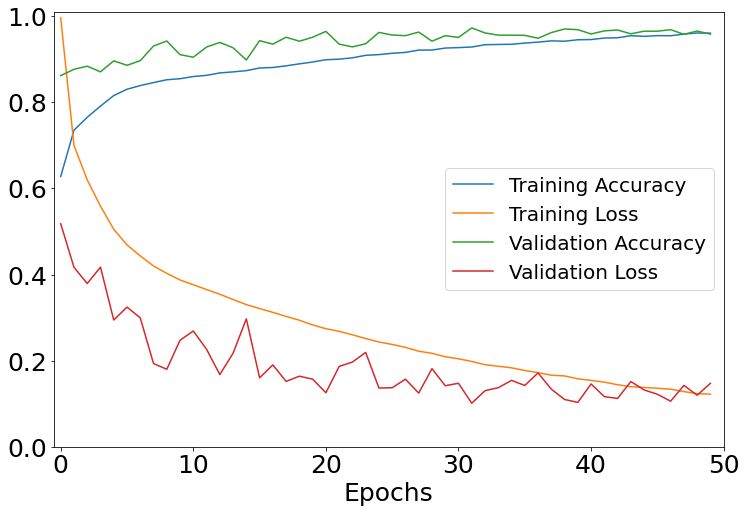

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots()
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(12,8)

ax.plot(epochs , train_acc, label = 'Training Accuracy')
ax.plot(epochs , train_loss, label = 'Training Loss')
ax.plot(epochs , val_acc, label = 'Validation Accuracy')
ax.plot(epochs , val_loss, label = 'Validation Loss')
ax.grid(False)
ax.legend(prop={'size': 20})
ax.set_xlabel("Epochs",fontsize=25)
ax.set_xlim(-0.5, 50)
ax.set_ylim(-0, 1.01)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)



In [ ]:
results = model_mlp.evaluate(X_test,y_test)
print(f'MLP Model Test Dataset Loss: {results[0]} and Test Dataset Accuracy : {results[1]}')

685/685 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8917
MLP Model Test Dataset Loss: 0.3204846680164337 and Test Dataset Accuracy : 0.8916956186294556


In [ ]:
mlp_predicted  = model_mlp.predict(X_test)
mlp_predicted = [np.argmax(i) for i in mlp_predicted]
print('MLP Model Performance on Test Dataset')
print('-------------------------------------------------------')
print(classification_report(y_test, mlp_predicted))


MLP Model Performance on Test Dataset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     18118
         1.0       0.36      0.82      0.50       556
         2.0       0.69      0.93      0.79      1448
         3.0       0.17      0.94      0.29       162
         4.0       0.96      0.95      0.95      1608

    accuracy                           0.89     21892
   macro avg       0.63      0.90      0.69     21892
weighted avg       0.95      0.89      0.91     21892



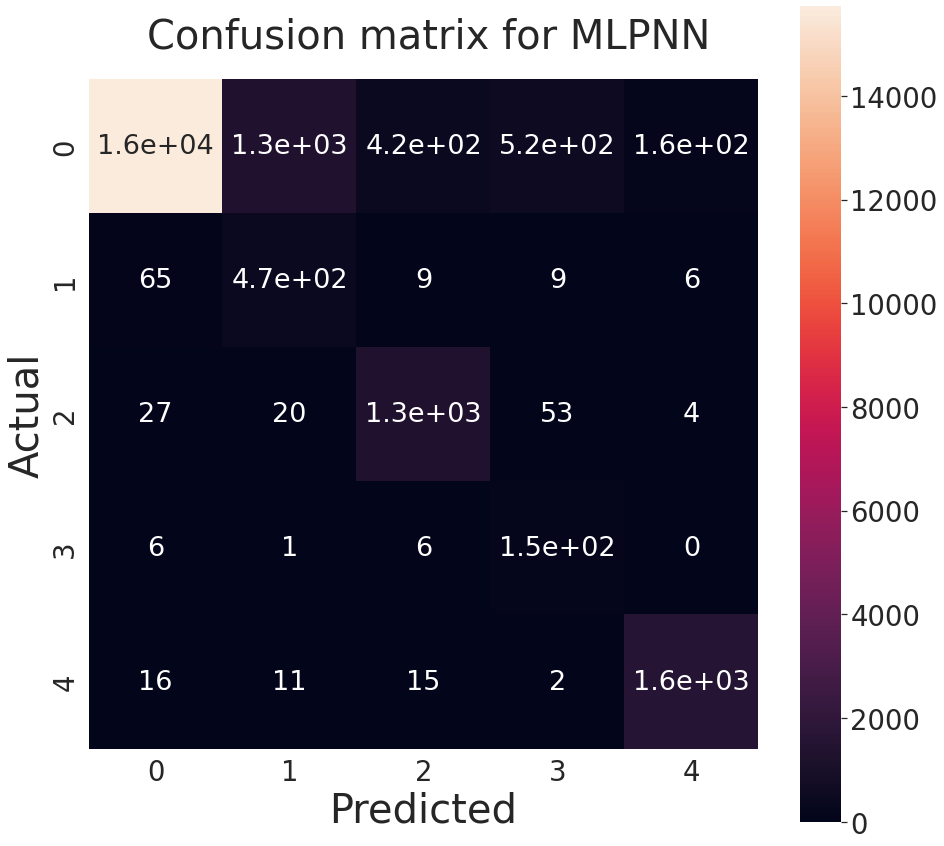

In [ ]:
#plotting heatmap of confusion matrix for MLP
cm_mlp = tf.math.confusion_matrix(labels = y_test, predictions = mlp_predicted)
plt.figure(figsize = (15,15))
sns.heatmap(cm_mlp, annot=True, annot_kws={"size": 27}, square=True)

sns.set(font_scale=2.5)
plt.xlabel('Predicted',fontsize=40)
plt.ylabel('Actual',fontsize=40)
plt.suptitle('Confusion matrix for MLPNN', size=40, y=0.87,x=0.44)
plt.show()


### 9. Implementing CNN

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
model_cnn= Sequential()

model_cnn.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model_cnn.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model_cnn.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model_cnn.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model_cnn.add(Dropout(0.5))

model_cnn.add(Flatten())

model_cnn.add(Dense(units = 512, activation='relu'))
model_cnn.add(Dense(units = 1024, activation='relu'))

model_cnn.add(Dense(units = 5, activation='softmax'))

In [ ]:
model_cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_cnn = model_cnn.fit(X_train,y_train, epochs = 50,verbose=1, validation_split=0.1)

Epoch 1/50
704/704 [==============================] - 12s 5ms/step - loss: 0.4462 - accuracy: 0.8335 - val_loss: 0.1556 - val_accuracy: 0.9452
Epoch 2/50
704/704 [==============================] - 3s 5ms/step - loss: 0.2095 - accuracy: 0.9238 - val_loss: 0.0346 - val_accuracy: 0.9892
Epoch 3/50
704/704 [==============================] - 3s 5ms/step - loss: 0.1374 - accuracy: 0.9520 - val_loss: 0.1184 - val_accuracy: 0.9640
Epoch 4/50
704/704 [==============================] - 4s 5ms/step - loss: 0.0966 - accuracy: 0.9655 - val_loss: 0.0543 - val_accuracy: 0.9844
Epoch 5/50
704/704 [==============================] - 3s 5ms/step - loss: 0.0782 - accuracy: 0.9735 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 6/50
704/704 [==============================] - 3s 5ms/step - loss: 0.0634 - accuracy: 0.9783 - val_loss: 0.0648 - val_accuracy: 0.9832
Epoch 7/50
704/704 [==============================] - 3s 5ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0810 - val_accuracy: 0.9832
Epoch

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

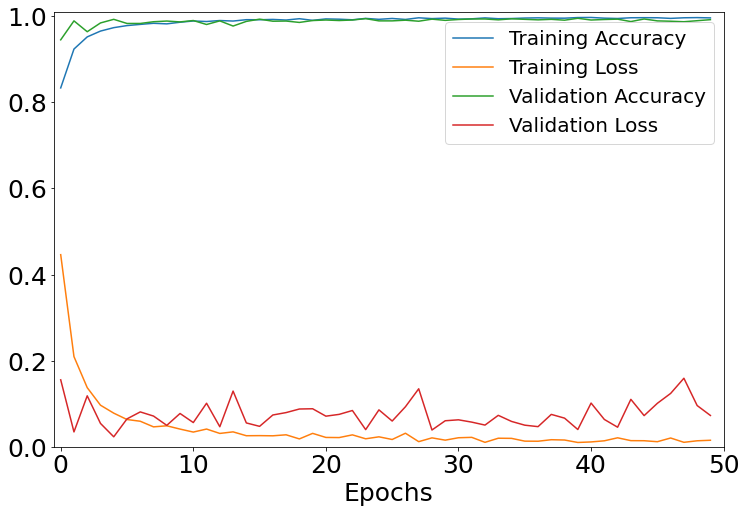

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots()
train_acc = history_cnn.history['accuracy']
train_loss = history_cnn.history['loss']
val_acc = history_cnn.history['val_accuracy']
val_loss = history_cnn.history['val_loss']
fig.set_size_inches(12,8)

ax.plot(epochs , train_acc, label = 'Training Accuracy')
ax.plot(epochs , train_loss, label = 'Training Loss')
ax.plot(epochs , val_acc, label = 'Validation Accuracy')
ax.plot(epochs , val_loss, label = 'Validation Loss')

ax.legend()
ax.set_xlabel("Epochs")

ax.grid(False)
ax.legend(prop={'size': 20})
ax.set_xlabel("Epochs",fontsize=25)
ax.set_xlim(-0.5, 50)
ax.set_ylim(-0, 1.01)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [ ]:
results_cnn = model_cnn.evaluate(X_test,y_test)
print(f'CNN Model Test Dataset Loss: {results_cnn[0]} and Test Dataset Accuracy : {results_cnn[1]}')

NameError: ignored

In [ ]:
cnn_predicted  = model_cnn.predict(X_test)
cnn_predicted = [np.argmax(i) for i in cnn_predicted]
print('CNN Model Performance on Test Dataset')
print('-------------------------------------------------------')
print(classification_report(y_test, cnn_predicted))

CNN Model Performance on Test Dataset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     18118
         1.0       0.57      0.86      0.68       556
         2.0       0.87      0.96      0.91      1448
         3.0       0.47      0.90      0.62       162
         4.0       0.96      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.77      0.93      0.83     21892
weighted avg       0.97      0.96      0.96     21892



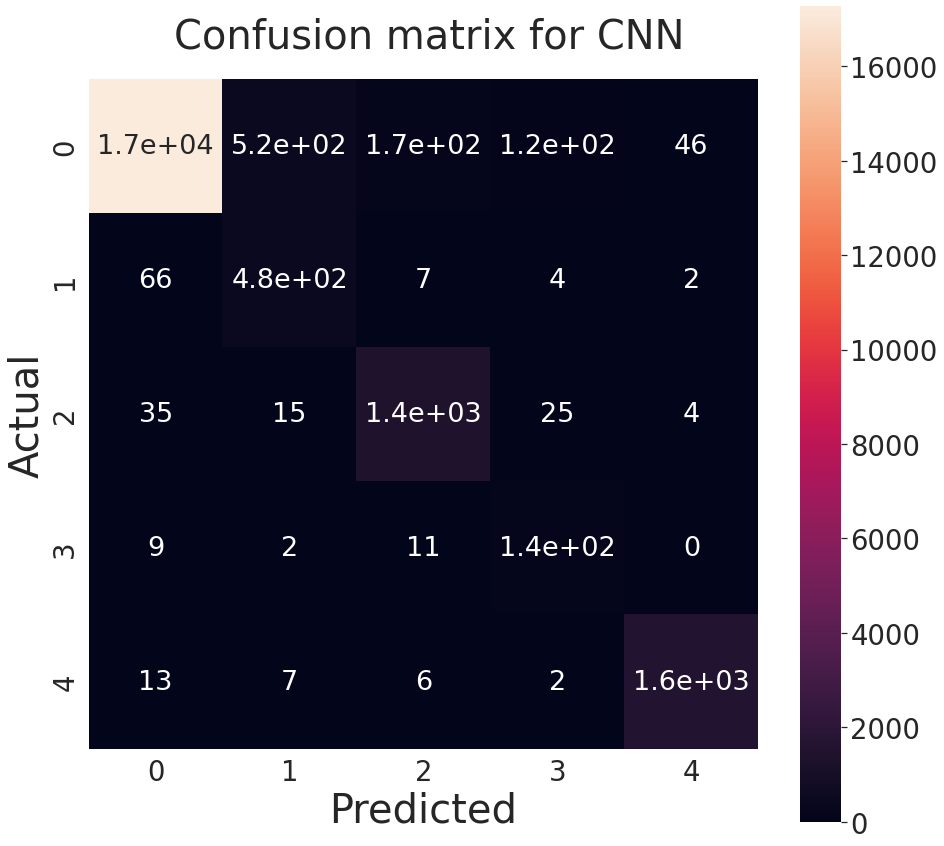

In [ ]:
#plotting heatmap of confusion matrix for MLP
cm_cnn = tf.math.confusion_matrix(labels = y_test, predictions = cnn_predicted)
plt.figure(figsize = (15,15))
sns.heatmap(cm_cnn, annot=True, annot_kws={"size": 27}, square=True)

sns.set(font_scale=2.5)
plt.xlabel('Predicted',fontsize=40)
plt.ylabel('Actual',fontsize=40)
plt.suptitle('Confusion matrix for CNN', size=40, y=0.87,x=0.44)
plt.show()

### 10. ROC Curves for each class by each model

In [ ]:
y_predicted_xgb = classifier.predict_proba(X_test)

In [ ]:
y_predicted_knn = knn_best.predict_proba(X_test)
y_predicted_rf = clf_best.predict_proba(X_test)

In [ ]:
y_predicted_xgb = label_binarize(y_test_pred_xgb, classes=[0, 1, 2,3,4])
y_predicted_knn = label_binarize(y_best_pred_knn, classes=[0, 1, 2,3,4])
y_predicted_rf = label_binarize(y_test_pred_rf, classes=[0, 1, 2,3,4])


In [ ]:
y_predicted_mlp = label_binarize(mlp_predicted, classes=[0, 1, 2,3,4])
y_predicted_cnn = label_binarize(cnn_predicted, classes=[0, 1, 2,3,4])

In [ ]:
# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
fpr_mlp = dict()
tpr_mlp = dict()
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_mlp = dict()
roc_auc_xgb = dict()
roc_auc_cnn = dict()
n_classes = y_train_bin.shape[1]
fpr_knn = dict()
tpr_knn = dict()
fpr_rf = dict()
tpr_rf = dict()
roc_auc_knn = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_predicted_xgb[:, i])
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test_bin[:, i], y_predicted_mlp[:, i])
    fpr_cnn[i], tpr_cnn[i], _  = roc_curve(y_test_bin[:, i], y_predicted_cnn[:, i])
    fpr_knn[i], tpr_knn[i], _  = roc_curve(y_test_bin[:, i], y_predicted_knn[:, i])
    fpr_rf[i], tpr_rf[i], _  = roc_curve(y_test_bin[:, i], y_predicted_rf[:, i])
    
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    
    plt.plot(fpr_xgb[i], tpr_xgb[i], label='XGB ROC curve (area = %0.2f)' % roc_auc_xgb[i])
    plt.plot(fpr_mlp[i], tpr_mlp[i], label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp[i])
    plt.plot(fpr_cnn[i], tpr_cnn[i], label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn[i])
    plt.plot(fpr_knn[i], tpr_knn[i], label='KNN ROC curve (area = %0.2f)' % roc_auc_knn[i])
    plt.plot(fpr_rf[i], tpr_rf[i], label='RF ROC curve (area = %0.2f)' % roc_auc_rf[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title(f'Receiver operating characteristic for class {i}',fontsize=15)
    plt.legend(loc="lower right")
    plt.savefig("ROC_Curves.png")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

NameError: ignored